In [127]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')



In [128]:

#Import Data
data = 'C:\MCS\Clustering\mail.csv'
df = pd.read_csv(data)
# shape of data
df.shape
#Head of data
df.head()


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40313 entries, 0 to 40312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     40136 non-null  object 
 1   nbr     32735 non-null  float64
 2   Sizekb  32734 non-null  float64
dtypes: float64(2), object(1)
memory usage: 945.0+ KB


In [130]:
#Drop the rows where at least one element is missing.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32558 entries, 0 to 32699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     32558 non-null  object 
 1   nbr     32558 non-null  float64
 2   Sizekb  32558 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1017.4+ KB


In [131]:
df.isnull().sum()


SAN       0
nbr       0
Sizekb    0
dtype: int64

In [132]:
#Drop Columns
#df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
#Declare feature vector and target variable
X = df
#yorg = df['status_type']
# Convert categorical variable into integers
le = LabelEncoder()
#X['status_type'] = le.fit_transform(X['status_type'])
#yorg = le.transform(yorg)
#View the summary of X
X.info()
X.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32558 entries, 0 to 32699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     32558 non-null  object 
 1   nbr     32558 non-null  float64
 2   Sizekb  32558 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1017.4+ KB


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [133]:

#Feature Scaling
cols = X.columns
ORGdf=df.copy()
print( cols)
ORGdf.head()

Index(['SAN', 'nbr', 'Sizekb'], dtype='object')


,SAN,nbr,Sizekb
0,erpprod,10106.0,17.70
1,CBEMMS,1738.0,6.27
2,YonatanMedhane,468.0,138.01
3,BAYOUTILAHUN,277.0,143.71
4,BiniyamZewdu,270.0,191.88


In [134]:

y = pd.DataFrame(X, columns=['nbr', 'Sizekb'])
yid = pd.DataFrame(X, columns=['SAN'])
y.head()


,nbr,Sizekb
0,10106.0,17.70
1,1738.0,6.27
2,468.0,138.01
3,277.0,143.71
4,270.0,191.88


In [135]:
ms = MinMaxScaler()
y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=['nbr', 'Sizekb'])
y.head()


,nbr,Sizekb
0,1.000000,0.001341
1,0.171895,0.000475
2,0.046215,0.010454
3,0.027313,0.010885
4,0.026620,0.014534


In [136]:
yid.head()


,SAN
0,erpprod
1,CBEMMS
2,YonatanMedhane
3,BAYOUTILAHUN
4,BiniyamZewdu


In [137]:

#ms = MinMaxScaler()
#X = ms.fit_transform(X)
#X = pd.DataFrame(X, columns=[cols])
#X.head()
#X = pd.concat([yid, y], axis=1)
#X.head()

In [138]:
#K-Means model with two clusters
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(y)
#K-Means model parameters study
kmeans.cluster_centers_


array([[0.00047389, 0.0192156 ],
       [0.00085953, 0.10106969]])

In [139]:
#Inertia should be near  0
kmeans.inertia_
#The lesser the model inertia, the better the model fit.
#We can see that the model has very high inertia. So, this is not a good model fit to the data


30.231229379197874

In [140]:

#Check quality of weak classification by the model
labels = kmeans.labels_
print(labels)


[0 0 0 ... 0 1 0]


In [141]:

# check how many of the samples were correctly labeled
#correct_labels = sum(yorg == labels)
#print("Result: %d out of %d samples were correctly labeled." % (correct_labels, yorg.size))
#print('Accuracy score: {0:0.2f}'. format(correct_labels/float(yorg.size)))


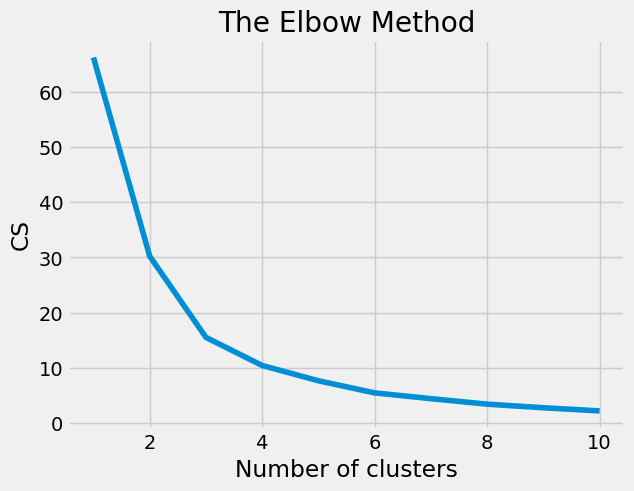

In [142]:

#Use elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
ni=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    cs.append(kmeans.inertia_)
    # The number of iterations required to converge
    ni.append(kmeans.n_iter_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()




In [143]:
#Show Inertia for each K
np.set_printoptions(threshold=20)
#K=2
print("Inertia for K= 2 is" ,cs[1])
#K=4
print("Inertia for K= 4 is" ,cs[3])
#K=6
print("Inertia for K= 6 is" ,cs[5])
#K=8
print("Inertia for K= 8 is" ,cs[7])

Inertia for K= 2 is 30.231229379197863
Inertia for K= 4 is 10.37987622218081
Inertia for K= 6 is 5.403863866079367
Inertia for K= 8 is 3.3595978593313003


In [144]:
#Show Number of iteration max is 300
np.set_printoptions(threshold=20)
print(ni)

[2, 11, 19, 24, 9, 10, 13, 8, 24, 4]


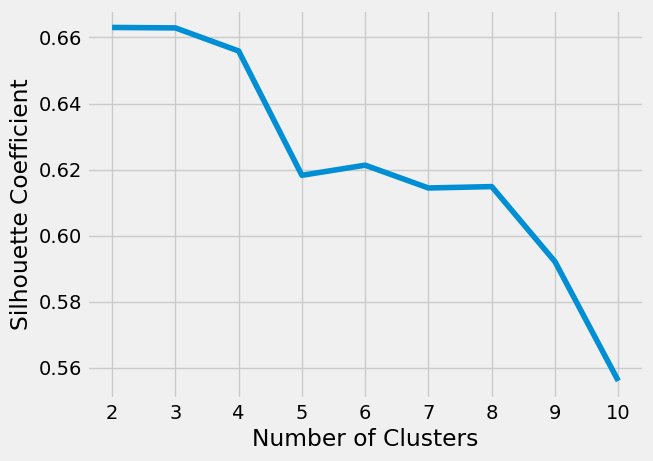

In [145]:
#The silhouette coefficient 
# A list holds the silhouette coefficients for each k
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }
silhouette_coefficients = []
from sklearn.metrics import silhouette_score
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(y)
     score = silhouette_score(y, kmeans.labels_)
     silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [146]:
#K-Means model with 4 clusters based on the 2 plots above
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(y)
#K-Means model parameters study
kmeans.cluster_centers_

array([[0.0003293 , 0.01194384],
       [0.00081079, 0.12687466],
       [0.00040026, 0.27194733],
       [0.00098093, 0.05790523]])

In [147]:
#Centroides
Centroides = kmeans.cluster_centers_
Centroides =pd.DataFrame(Centroides, columns=['Nbr_Emails','SizeKB'])
#Centroides .info()
Centroides = ms.inverse_transform(Centroides)
Centroides =pd.DataFrame(Centroides, columns=['Nbr_Emails','SizeKB'])
Centroides

,Nbr_Emails,SizeKB
0,4.327544,157.682517
1,9.193069,1674.999298
2,5.044619,3590.248714
3,10.912253,764.464784


In [148]:
#labels generated
labels = kmeans.labels_
Profiles=pd.DataFrame(labels, columns=['Profile'])
Profiles.info()
#Profiles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32558 entries, 0 to 32557
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Profile  32558 non-null  int32
dtypes: int32(1)
memory usage: 127.3 KB


In [149]:
ORGdf.info()
Profiles.info()
ORGdf = pd.concat([ORGdf,Profiles], axis=1)
ORGdf.info()
ORGdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32558 entries, 0 to 32699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAN     32558 non-null  object 
 1   nbr     32558 non-null  float64
 2   Sizekb  32558 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1017.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32558 entries, 0 to 32557
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Profile  32558 non-null  int32
dtypes: int32(1)
memory usage: 127.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32700 entries, 0 to 23617
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SAN      32558 non-null  object 
 1   nbr      32558 non-null  float64
 2   Sizekb   32558 non-null  float64
 3   Profile  32558 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


,SAN,nbr,Sizekb,Profile
0,erpprod,10106.0,17.70,0.0
1,CBEMMS,1738.0,6.27,0.0
2,YonatanMedhane,468.0,138.01,0.0
3,BAYOUTILAHUN,277.0,143.71,0.0
4,BiniyamZewdu,270.0,191.88,0.0


In [150]:
#Export Data
exportedfile = 'C:\MCS\Clustering\mail_exports.csv'
ORGdf.to_csv(exportedfile)
exportedfile = 'C:\MCS\Clustering\centroides_exports.csv'
Centroides.to_csv(exportedfile)